# Convolution

Convolution is a mathematical operation that is pervasive throughout the field of digital signal processing. It is defined as the integral of the product of the two functions after one is reversed and shifted. The formula for convolution is:

$$x(t) * h(t) \, = \, \int_{-\infty}^{\infty} x(t) \cdot h(t-\tau) d \tau$$

Convolution is *[commutative](https://en.wikipedia.org/wiki/Commutative_property)*, meaning that:

$$x(t) * h(t) \, = \, h(t) * x(t) \, = \, \int_{-\infty}^{\infty} h(t) \cdot x(t-\tau) d \tau$$

## Discrete Convolution

Discrete convolution is an operation on two discrete sequences of indefinte length, defined by the formula:

$$\begin{aligned} 
y(n) \, &= \, x(n) * h(n) \, = \, \sum_{k\,=\,-\infty}^{\infty} x(k) \cdot h(n-k) \\ 
&= \, h(n) * x(n) \, = \, \sum_{k\,=\,-\infty}^{\infty} h(k) \cdot x(n-k) \\
\end{aligned}$$ 

## Linear Convolution

Linear convolution is the convolution of a potentially infinite-length sequence $x(n)$ with a finite length sequence $h(n)$ of length $N$, where $h(n) = h(0), ... , h(N-1)$. Linear convolution is defined by the formula:

$$y(n) \, = \, x(n) * h(n) \, = \, \sum_{k=0}^{N-1} x(n-k) \cdot h(k)$$

In the case that $x(n)$ is also finite-length with length $M$, such that $x(n) = x(0), ..., x(M-1)$, the linear convolution is defined by the formula:

$$y(n) \, = \, x(n) * h(n) \, = \sum_{k \, = \, max\{0, \, n-M+1\}}^{min\{ \, n, \, \,  N - 1 \, \}} x(n-k) \cdot h(k)$$

For this case, the formula is defined only where $x(n)$ and $h(n)$ are overlapping. The output $y(n)$ has length $M+N-1$.



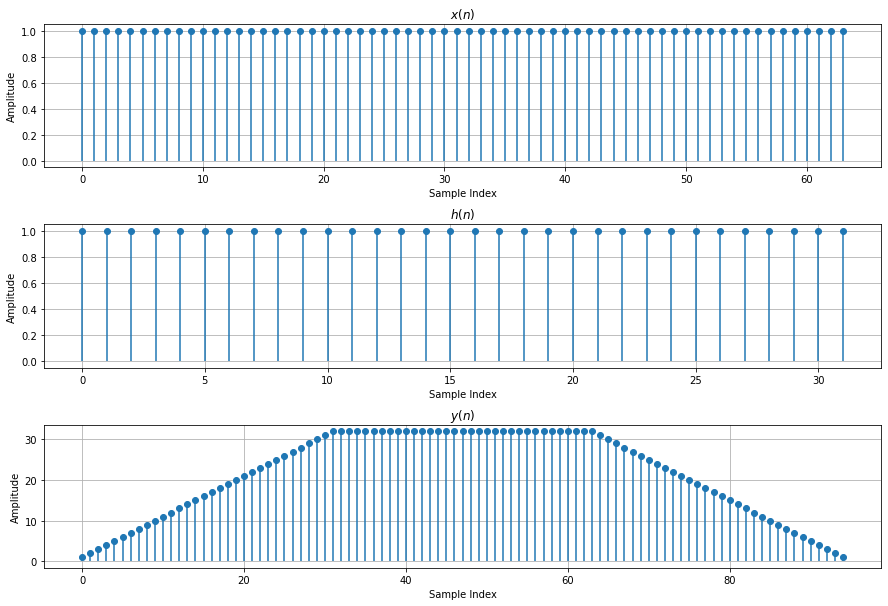

In [1]:
# Linear Convolution Example

import numpy as np
import matplotlib.pyplot as plt

# Create x(n)
M = 64
x = np.ones(M)
x_idxs = np.arange(0, M)

# Create h(n)
N = 32
h = np.ones(N)
h_idxs = np.arange(0, N)

# Create empty y(n)
y = np.empty(M+N-1)
y_idxs = np.arange(0, M+N-1)

# Perform convolution
for n in y_idxs:
    k_start = max(0, n-M+1)
    k_stop = min(n, N-1)
    k = np.arange(k_start, k_stop+1)
    y[n] = np.sum(x[n-k] * h[k])

# Plot convolution result
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Plot x(n)
ax[0].grid()
ax[0].stem(x_idxs, x, basefmt=' ')
ax[0].set_title('$x(n)$')
ax[0].set_xlabel('Sample Index')
ax[0].set_ylabel('Amplitude')

# Plot h(n)
ax[1].grid()
ax[1].stem(h_idxs, h, basefmt=' ')
ax[1].set_title('$h(n)$')
ax[1].set_xlabel('Sample Index')
ax[1].set_ylabel('Amplitude')

# Plot y(n)
ax[2].grid()
ax[2].stem(y_idxs, y, basefmt=' ')
ax[2].set_title('$y(n)$')
ax[2].set_xlabel('Sample Index')
ax[2].set_ylabel('Amplitude')

plt.subplots_adjust(hspace=0.4)
pass


## Linear Convolution Using a Matrix-Vector Product 

Linear convolution of two finite-length sequences can be expressed as the following matrix-vector product [[Wefers, 2015]](README.md):

$$\begin{bmatrix} 
    y_0 \\ 
    y_1 \\
    \vdots \\
    y_{M+N-2}
\end{bmatrix} = 
\begin{bmatrix} 
    h_0     & 0         & \ldots    & 0         & 0         \\
    h_1     & h_0       & \ldots    & \vdots    & \vdots    \\
    h_2     & h_1       & \ldots    & 0         & 0         \\
    \vdots  & h_2       & \ldots    & h_0       & 0         \\
    h_{N-2} & \vdots    & \ldots    & h_1       & h_0       \\
    h_{N-1} & h_{N-2}   & \ddots    & \vdots    & h_1       \\
    0       & h_{N-1}   & \ldots    & h_{N-3}   & \vdots    \\
    0       & 0         & \ldots    & h_{N-2}   & h_{N-3}   \\
    \vdots  & \vdots    & \vdots    & h_{N-1}   & h_{N-2}   \\
    0       & 0         & 0         & \ldots    & h_{N-1}   \\
\end{bmatrix} 
\begin{bmatrix} 
    x_0 \\ 
    x_1 \\
    \vdots \\
    x_{M-1}
\end{bmatrix}
$$

where:
* $x(n)$ cooresponds to an $M$ element vector $\vec{x} = [x_0 \ldots x_{M-1}]^T$ 
* $y(n)$ cooresponds to an ($M+N-1$) element vector $\vec{y} = [y_0 \ldots y_{M+N-2}]^T$
* $h(n)$ is a convolution matrix with $M+N-1$ rows and $M$ columns, where the columns contaoin shifted versions of the sequence $h(n)$, padded by zeros

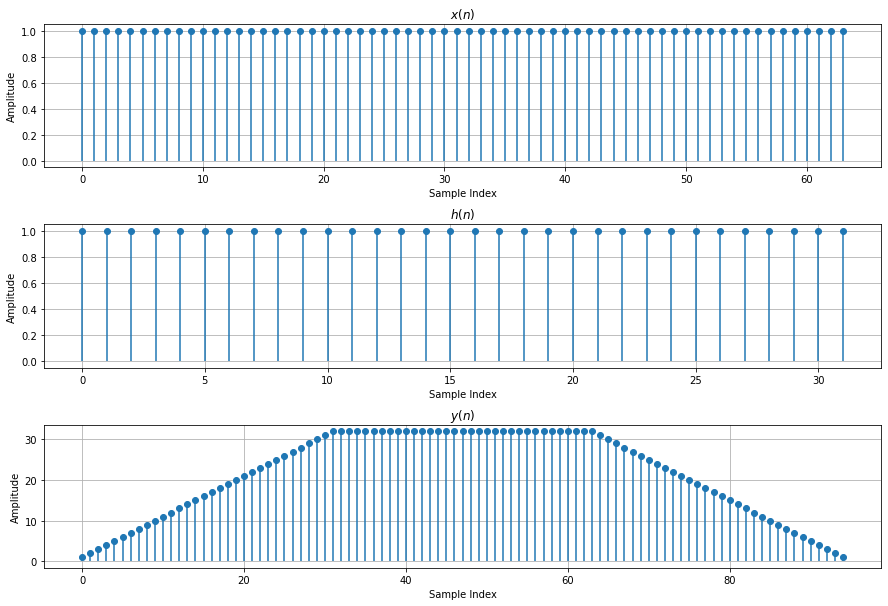

In [2]:
# Linear Convolution Using a Matrix-Vector Product Example

import numpy as np
import matplotlib.pyplot as plt

# Create x(n)
M = 64
x = np.ones((M, 1))
x_idxs = np.arange(0, M)

# Create h(n)
N = 32
h = np.ones(N)
h_idxs = np.arange(0, N)

# Create h(n) matrix
h_mat = np.zeros((M+N-1, M))
for n in range(0, M+N-1):
    col_start = max(0, n-N+1)
    col_stop = min(n+1, M)
    h_mat[n, col_start:col_stop] = h[:col_stop-col_start]

# Calculate y(n)
y = h_mat @ x
y_idxs = np.arange(0, M+N-1)

# Plot convolution result
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Plot x(n)
ax[0].grid()
ax[0].stem(x_idxs, x, basefmt=' ')
ax[0].set_title('$x(n)$')
ax[0].set_xlabel('Sample Index')
ax[0].set_ylabel('Amplitude')

# Plot h(n)
ax[1].grid()
ax[1].stem(h_idxs, h, basefmt=' ')
ax[1].set_title('$h(n)$')
ax[1].set_xlabel('Sample Index')
ax[1].set_ylabel('Amplitude')

# Plot y(n)
ax[2].grid()
ax[2].stem(y_idxs, y, basefmt=' ')
ax[2].set_title('$y(n)$')
ax[2].set_xlabel('Sample Index')
ax[2].set_ylabel('Amplitude')

plt.subplots_adjust(hspace=0.4)
pass


## Linear Convolution Using a Polynomial Product 

Linear convolution of two finite-length sequences can be expressed as the following polynomial product [[Wefers, 2015]](README.md):

$$\begin{aligned}
y(n) \, &= \, x(n) \, * \, h(n) \quad \hat{=} \quad Y = X \cdot H \\
&\text{where:} \\

X \, &= \, \sum_{n=0}^{M-1} x(n) \, z^n \\
&= \, x(0) + x(1) \, z + x(2) \, z^2 + ... + x(M-1) \, z^{M-1} \\

H \, &= \, \sum_{n=0}^{N-1} h(n) \, z^n \\
&= \, h(0) + h(1) \, z + h(2) \, z^2 + ... + h(N-1) \, z^{N-1} \\

Y \, &= \, \sum_{n=0}^{M+N-2} y_n \, z^n \\
&= \, y_0 + y_1 \, z + y_2 \, z^2 + ... + y_{M+N-2} \, z^{M+N-2} \\
\text{with \quad} y_k &= \sum_{i=0}^{k} x_i \, h_{k-i} \\
\end{aligned}$$

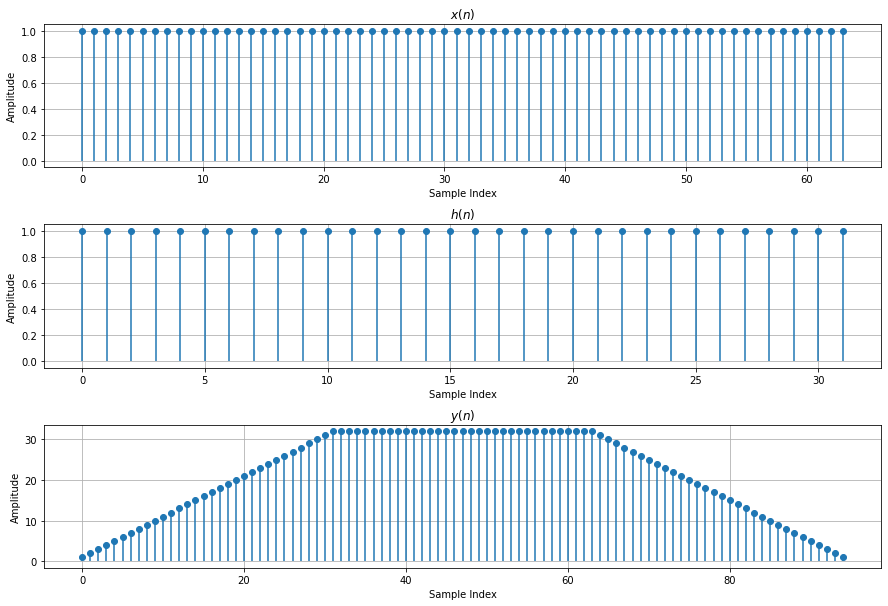

In [3]:
# Linear Convolution Using a Polynomial Product Example

import numpy as np
import matplotlib.pyplot as plt

# Create x(n)
M = 64
x = np.ones(M)
x_idxs = np.arange(0, M)

# Create h(n)
N = 32
h = np.ones(N)
h_idxs = np.arange(0, N)

# Calculate y(n)
y = np.polymul(x,h)
y_idxs = np.arange(0, M+N-1)

# Plot convolution result
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Plot x(n)
ax[0].grid()
ax[0].stem(x_idxs, x, basefmt=' ')
ax[0].set_title('$x(n)$')
ax[0].set_xlabel('Sample Index')
ax[0].set_ylabel('Amplitude')

# Plot h(n)
ax[1].grid()
ax[1].stem(h_idxs, h, basefmt=' ')
ax[1].set_title('$h(n)$')
ax[1].set_xlabel('Sample Index')
ax[1].set_ylabel('Amplitude')

# Plot y(n)
ax[2].grid()
ax[2].stem(y_idxs, y, basefmt=' ')
ax[2].set_title('$y(n)$')
ax[2].set_xlabel('Sample Index')
ax[2].set_ylabel('Amplitude')

plt.subplots_adjust(hspace=0.4)
pass


## Linear Convolution Computational Complexity

Linear convolution can implemented using tapped delay line (illustrated below). The computational complexity of linear convolution can be calculated for both infinite and finite length input sequences [[Wefers, 2015]](README.md).

![](images/tapped_delay_line.png 'Tapped Delay Line')

For an infinite length input sequence with $h(n)$ of length $N$, the computational complexity can be calculated as the number of arithmetic operations *per output sample* using the formula:

$$T(N) \, = \, 2N - 1 \quad \in \quad O(N)$$

where there are $N$ multiplications and $N-1$ additions per output sample. 

For a finite length input sequence of length $M$ and an $h(n)$ of length $N$, the computational complexity can be calculated as the *total* number of arithmetic operations using the formula:

$$T(M,N) \, = \, 2 M N - (M + N - 1) \quad \in \quad O(M \cdot N)$$



## Circular Convolution

Circular convolution (AKA cyclic convolution) is an adpted form of discrete convolution that assumes some periodicity of the input sequences and takes advantage of that periodicity [[Wefers, 2015]](README.md). 

$$\begin{aligned} 
\tilde{y}(n) \, &= \, x(n) \, \circledast \, h(n) \\ 
&= \sum_{k = 0}^{N-1} \tilde{x}(n - k) \cdot \tilde{h}(k) \\ 
&= \sum_{k = 0}^{N-1} x{\langle n - k\rangle}_N \cdot h(k) 
\end{aligned}$$

where $\tilde{x}(n) \, = \, x{\langle n \rangle}_N$ is the *periodic continuation* of $x(n)$, meaning that the indices $-\infty \le n \le \infty$ are evaluated modulo the period $N$. ${\langle \cdot \rangle}_N$ denotes the residule of the integer $n$ modulo $N$. Since the sum is only evaluated from $k = 0$ to $N-1$, the modulo can be dropped from the $h(k)$ term.

## Circular Convolution Using a Matrix-Vector Product 

Circular convolution can be expressed as a matrix-vector product of the form $\vec{\tilde{y}} = C \vec{x}$, where $x(n)$, $h(n)$ and $\tilde{y}(n)$ can be expressed as the $N$-element vectors $\vec{x}$, $\vec{h}$ and $\vec{\tilde{y}}$, and $C$ is an $N \times N$ [Toeplitz matrix](https://en.wikipedia.org/wiki/Toeplitz_matrix), that is called a *circulant matrix* or a *circular convolution matrix*. [[Wefers, 2015]](README.md). $C$ has the property that each row/column vector is shifted by one element. Below is an example of a length-5 circular convolution.

$$\begin{bmatrix} 
    \tilde{y}_0 \\ 
    \tilde{y}_1 \\
    \tilde{y}_2 \\
    \tilde{y}_3 \\
    \tilde{y}_4 
\end{bmatrix} = 
\begin{bmatrix} 
    h_0 & h_2   & h_1   & h_0   & h_2   \\
    h_1 & h_0   & h_2   & h_1   & h_0   \\
    h_2 & h_1   & h_0   & h_2   & h_1   \\
    h_0 & h_2   & h_1   & h_0   & h_2   \\
    h_1 & h_0   & h_2   & h_1   & h_0   \\
\end{bmatrix} 
\begin{bmatrix} 
    x_0 \\ 
    x_1 \\
    x_2 \\
    x_3 \\
    x_4 
\end{bmatrix}
$$

## Circular Convolution Using a Polynomial Product 

Circular convolution can be expressed as the following polynomial product [[Wefers, 2015]](README.md):

$$y(n) \, = \, x(n) \, \circledast \, h(n) \quad \hat{=} \quad Y \equiv X \cdot H \quad mod \quad z^N - 1$$

Below is an example of circular convolution as a polynomial product where $N = 3$.

$$\begin{array}{l|l}

x = \begin{array}{ccc}
        [2 &-1 &3]
    \end{array} 
    & \quad X = 2 - z + 3z^2 \\
h = \begin{array}{ccc} 
        [1 &2 &-1] 
    \end{array} 
    & \quad H = 1 +2z - z^2 \\
& \\
x * h = \begin{array}{ccccc} 
            [2 &3 &-1 &7 &-3] 
        \end{array} 
            & \begin{aligned}  
                \quad X \cdot H &= (2 -z + 3z^2) \cdot (1 +2z - z^2) \\
                & = 2 + 3z -z^2 + 7z^3 - 3z^4
            \end{aligned} \\
& \\
x \, \circledast \, h = 
    \begin{array}{ccc}
        [9 &0 &-1]
    \end{array}
    &\begin{aligned}
        \quad X \cdot H &= 2 + 3z -z^2 + 7z^3 - 3z^4 \\
        &= (7-3z) \cdot (z^3 - 1) + (9 - z^2) \\
        \quad X \cdot H & \quad mod \quad (z^3 - 1) = 9-z^2 
    \end{aligned}
\end{array}$$